<a href="https://colab.research.google.com/github/Takaros96/Regression-Analysis-with-Yellowbrick/blob/main/Coursera_guided_projects_Regression_Analysis_with_Yellowbrick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
import warnings
import seaborn as sns

In [ ]:
df=pd.read_csv('concrete.csv')

In [ ]:
df

,cement,slag,ash,water,splast,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [ ]:
features=df.drop(columns=['strength']).columns

In [ ]:
features

Index(['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age'], dtype='object')

In [ ]:
target='strength'
X=df[features]
y=df[target]

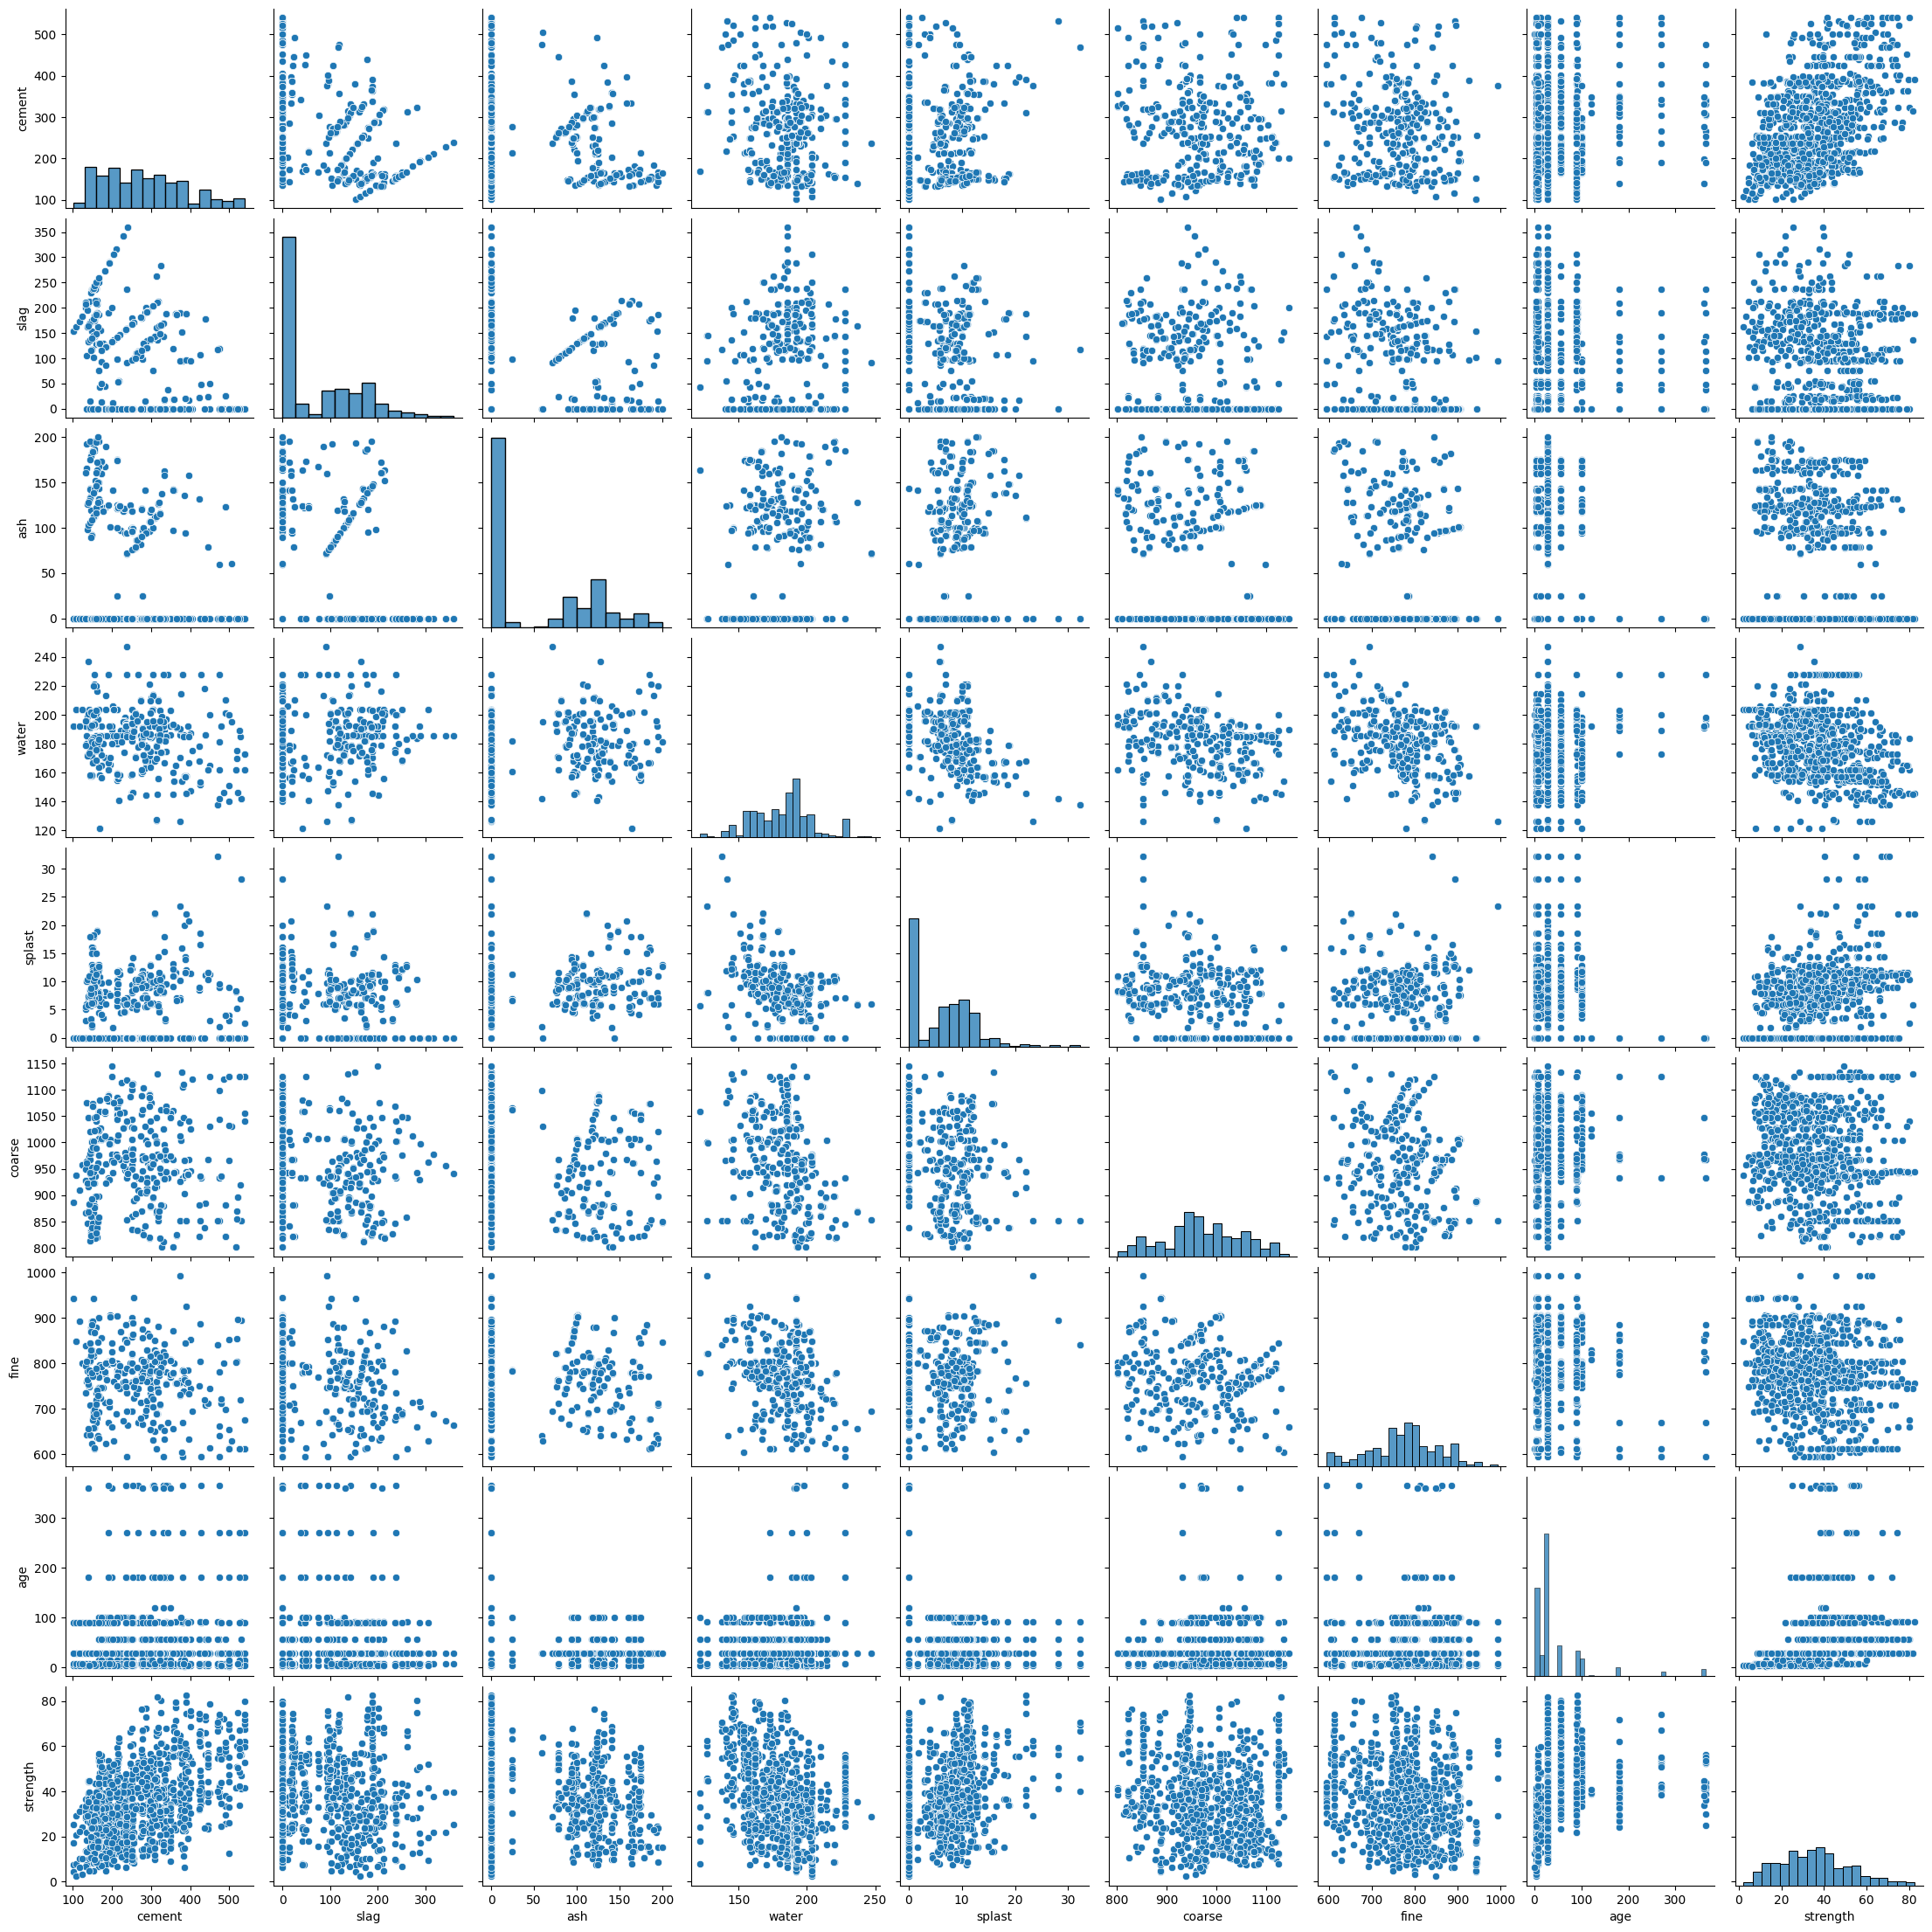

In [ ]:
sns.pairplot(df)#scatterplot helps understand discrete distributions

In [ ]:
#feature engineering entails selecting the minimum number of features to produce a valid model

In [ ]:
pip install yellowbrick

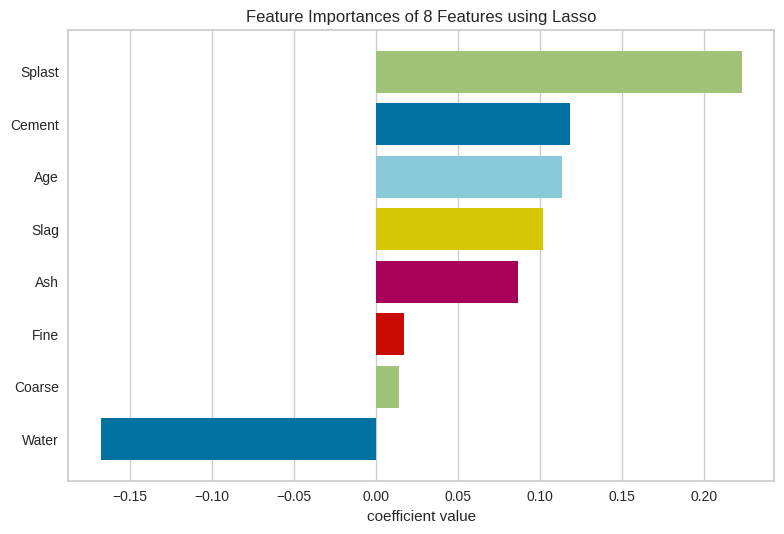

<Axes: title={'center': 'Feature Importances of 8 Features using Lasso'}, xlabel='coefficient value'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import Lasso

fig=plt.figure()
ax=fig.add_subplot()

labels=list(map(lambda s:s.title(),features))
viz=FeatureImportances(Lasso(),ax=ax,labels=labels,relative=False)

viz.fit(X,y)
viz.poof()#the higher the coefficient the more informative it is

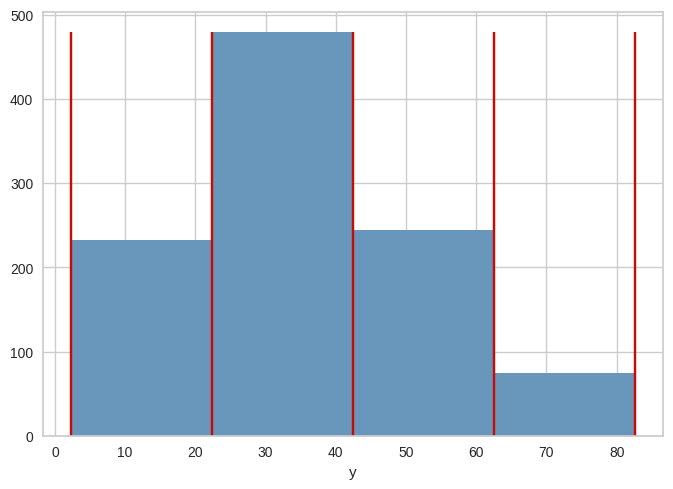

<Axes: xlabel='y'>

In [ ]:
from yellowbrick.target import BalancedBinningReference

visualizer=BalancedBinningReference()

visualizer.fit(y)

visualizer.poof()

In [ ]:
from yellowbrick.regressor import PredictionError

from sklearn.model_selection import train_test_split



In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

Text(0, 0.5, 'predicted')

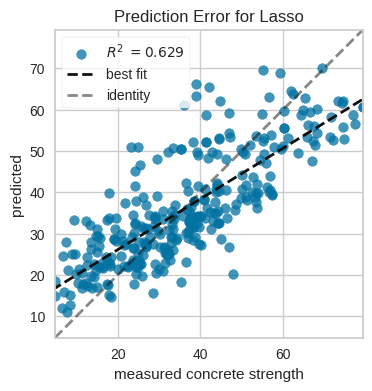

In [ ]:
visualizer=PredictionError(Lasso(),size=(600,400))

visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)

visualizer.finalize()

visualizer.ax.set_xlabel('measured concrete strength')
visualizer.ax.set_ylabel('predicted')


In [ ]:
#using yellowbrick we can show the residuals(difference between the predicted value and the truth)
#both for the training set and the testing set

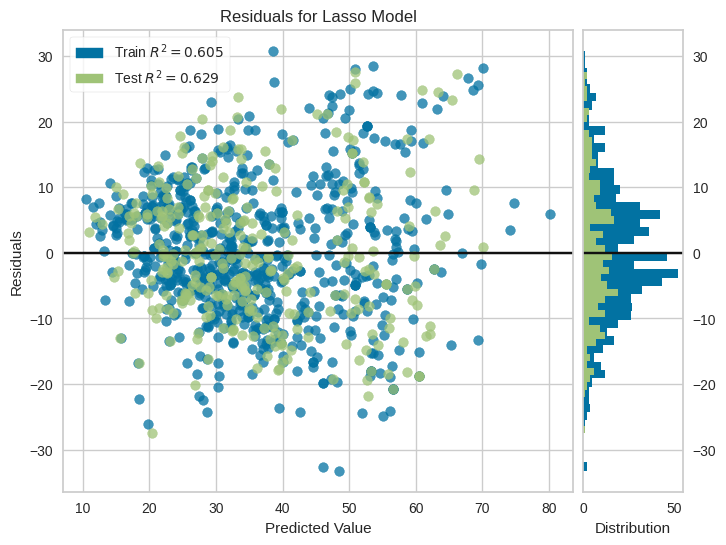

<Axes: title={'center': 'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer=ResidualsPlot(Lasso(),size=(800,600))

visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)

visualizer.poof()#the error is evenly distributed around zero which indicates a well fited model

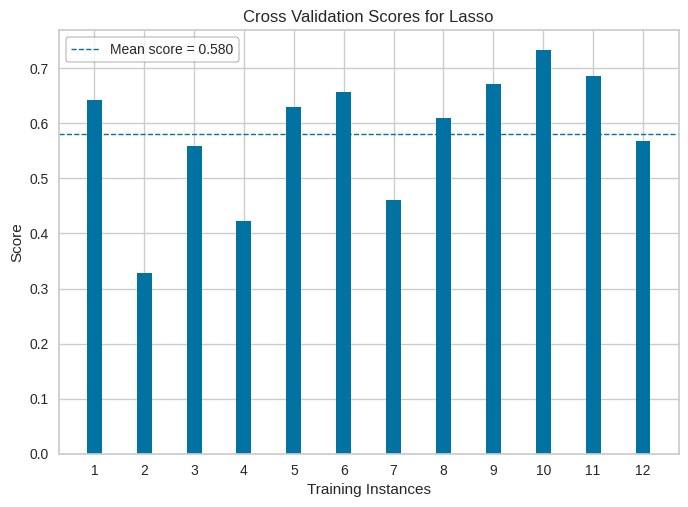

<Axes: title={'center': 'Cross Validation Scores for Lasso'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from sklearn.model_selection import KFold

from yellowbrick.model_selection import CVScores

_,ax=plt.subplots()
cv=KFold(12)
vizualizer=CVScores(Lasso(),ax=ax,cv=cv,scoring='r2')#cv is cross validation

vizualizer.fit(X_train,y_train).poof()

In [ ]:
#the learning curve shows the relationship of the training score versus the cross validated test score
#for an estimator with a varying number of estimated samples

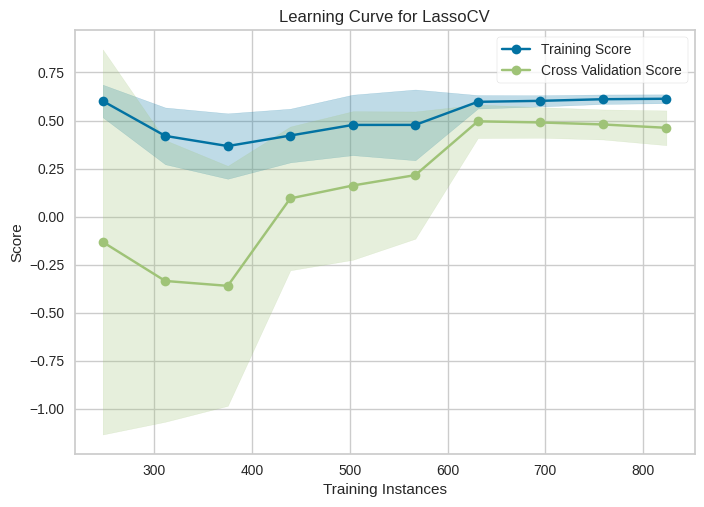

<Axes: title={'center': 'Learning Curve for LassoCV'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from yellowbrick.model_selection import LearningCurve

from sklearn.linear_model import LassoCV

sizes=np.linspace(0.3,1.0,10)#go from 0.3 to 1 in increments of 10

viz=LearningCurve(LassoCV(),train_sizes=sizes,scoring='r2')

viz.fit(X,y).poof()

In [ ]:
#the AlphaSelection Visualizer demonstrates how different values of alpha influence model selection
#during the regularization of linear models
#The higher the alpha, the less complex the model, decreasing the error due to variance (overfitting).

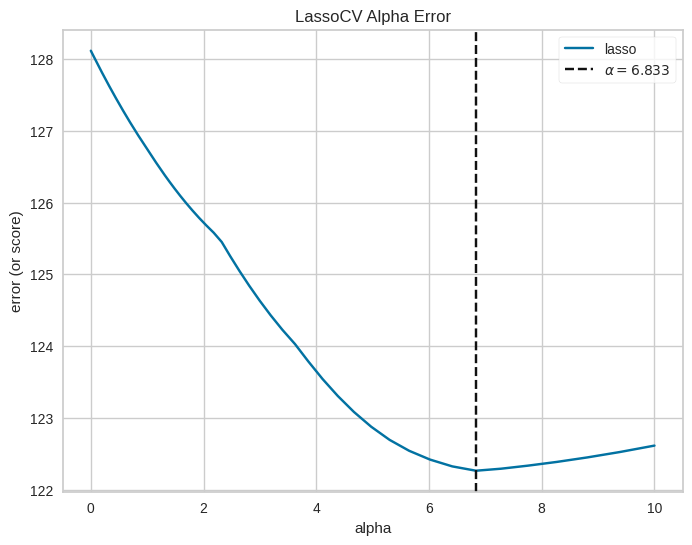

<Axes: title={'center': 'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [ ]:
#we want an alpha that minimizes underfitting and overfitting

from yellowbrick.regressor import AlphaSelection

alphas=np.logspace(-10,1,400)

model=LassoCV(alphas=alphas)

visualizer=AlphaSelection(model,size=(800,600))

visualizer.fit(X,y).poof()

In [ ]:
#the optimal value of alpha is 6.833
#coefficient of determination(R-Squared) measures the percentage of variance explained by the regression
#i.e how well future samples are likely to be predicted by the model

#regularization is designed to penalize model complexity.